# Project Title:
Aviation Accident Data Analysis for Safer Aircraft Investment

### Name: Brian Ndungu

### Date:  23rd July 2025

### Project Overview and Business Problem:
The aviation industry is expanding, and private/commercial aviation is gaining popularity in emerging markets. Our company is considering investing in aircraft for both passenger and private charter services. However, safety is a top concern — frequent accidents can lead to loss of life, lawsuits, and brand damage.

This project explores aviation accident data to identify:

1. Which aircraft types have the highest and lowest accident rates
2. Patterns or causes associated with frequent incidents
3. Recommendations on which aircraft types are safest for investment
4. By analyzing historical aviation accident data, we aim to support data-driven decisions when selecting aircraft models for our business operations.



In [ ]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and Inspect the Dataset
df = pd.read_csv('data/Aviation_Data.csv')
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Display the first 5 rows of the DataFrame
df.head()


Rows: 90348, Columns: 31


C:\Users\Hellen\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# Display the list of column names in the DataFrame
df.columns.tolist()

# Calculate and display the number of missing values per column, sorted in descending order
df.isnull().sum().sort_values(ascending=False)


Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

In [ ]:
# Drop irrelevant columns
cols_to_keep = [
    'Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Country',
    'Make', 'Model', 'Injury.Severity', 'Total.Fatal.Injuries',
    'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
    'Aircraft.damage', 'Amateur.Built', 'Purpose.of.flight', 'Engine.Type'
]

# Create a new DataFrame with only the selected columns
df_clean = df[cols_to_keep].copy()
# Convert the 'Event.Date' column to datetime format, handling invalid dates gracefully
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')
# Filter the DataFrame to include only accidents that occurred in the United States
df_clean = df_clean[df_clean['Country'] == 'United States']
# Standardize the 'Make' column by converting values to title case
df_clean['Make'] = df_clean['Make'].str.title()
# Convert the 'Model' column to uppercase for consistency
df_clean['Model'] = df_clean['Model'].str.upper()

# Replace missing values in the 'Aircraft.damage' column with 'Unknown'
df_clean['Aircraft.damage'] = df_clean['Aircraft.damage'].fillna('Unknown')

# Drop rows where 'Make' or 'Model' columns have missing values
df_clean.dropna(subset=['Make', 'Model'], inplace=True)

# Define a list of columns related to injury counts
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]
# Fill missing values in injury-related columns with 0
df_clean[injury_cols] = df_clean[injury_cols].fillna(0)

# Remove duplicate rows from the DataFrame
df_clean.drop_duplicates(inplace=True)

# Display the first 5 rows of the cleaned DataFrame
df_clean.head()


,Event.Id,Accident.Number,Event.Date,Location,Country,Make,Model,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Amateur.Built,Purpose.of.flight,Engine.Type
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,108-3,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,No,Personal,Reciprocating
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Piper,PA24-180,Fatal(4),4.0,0.0,0.0,0.0,Destroyed,No,Personal,Reciprocating
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",United States,Cessna,172M,Fatal(3),3.0,0.0,0.0,0.0,Destroyed,No,Personal,Reciprocating
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Rockwell,112,Fatal(2),2.0,0.0,0.0,0.0,Destroyed,No,Personal,Reciprocating
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",United States,Cessna,501,Fatal(1),1.0,2.0,0.0,0.0,Destroyed,No,Personal,NaN


In [ ]:
df_clean.isnull().sum().sort_values(ascending=False)
# Check for remaining missing values in the cleaned DataFrame and sort by count


Engine.Type               3007
Purpose.of.flight         2419
Injury.Severity            102
Amateur.Built               20
Location                    11
Aircraft.damage              0
Total.Uninjured              0
Total.Minor.Injuries         0
Total.Serious.Injuries       0
Total.Fatal.Injuries         0
Model                        0
Make                         0
Country                      0
Event.Date                   0
Accident.Number              0
Event.Id                     0
dtype: int64

In [ ]:
# Define a list of columns related to injury counts
injury_cols = [
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries', 'Total.Uninjured'
]
# Fill missing values in the injury-related columns with 0
df_clean[injury_cols] = df_clean[injury_cols].fillna(0)

In [ ]:
# Remove any duplicate rows from the cleaned DataFrame
df_clean.drop_duplicates(inplace=True)


I cleaned the dataset by:
- Selecting only relevant columns related to aircraft, date, injuries, and flight purpose.
- Dropping rows with missing critical values like `Make` and `Model`.
- Filling missing injury data with 0s.
- Removing duplicates.
- Converting columns to appropriate data types (`datetime` and `numeric`).
- Filtering for United States accidents for more reliable analysis.


Step 4: Exploratory Data Analysis (EDA)

In [ ]:
df_clean.describe(include='all', datetime_is_numeric=True)

,Event.Id,Accident.Number,Event.Date,Location,Country,Make,Model,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Amateur.Built,Purpose.of.flight,Engine.Type
count,82196,82196,82196,82185,82196,82196,82196,82094,82196.000000,82196.000000,82196.000000,82196.000000,82196,82176,79777,79189
unique,81306,82179,NaN,23025,1,7393,10780,56,NaN,NaN,NaN,NaN,4,2,26,12
top,20001212X19172,CEN22LA149,NaN,"ANCHORAGE, AK",United States,Cessna,152,Non-Fatal,NaN,NaN,NaN,NaN,Substantial,No,Personal,Reciprocating
freq,3,2,NaN,434,82196,25852,2323,64840,NaN,NaN,NaN,NaN,61648,73888,48512,68474
mean,NaN,NaN,1998-11-30 16:09:47.240254848,NaN,NaN,NaN,NaN,NaN,0.367062,0.221641,0.289637,4.042216,NaN,NaN,NaN,NaN
min,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1988-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1997-06-19 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2008-04-07 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,265.000000,137.000000,125.000000,699.000000,NaN,NaN,NaN,NaN


### analyze total injuries in relation with accident

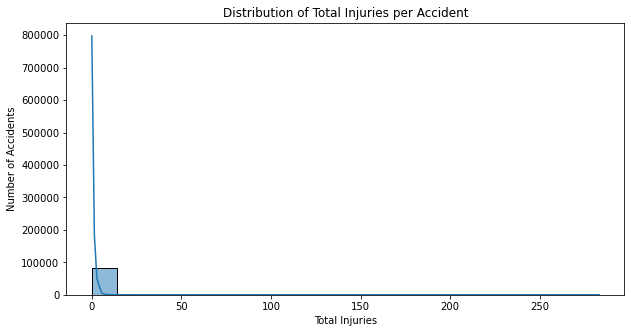

In [ ]:
# Total injuries and safety score
df_clean['Total_Injuries'] = (
    df_clean['Total.Fatal.Injuries'] +
    df_clean['Total.Serious.Injuries'] +
    df_clean['Total.Minor.Injuries']
)
df_clean['Safety_Score'] = (
    0.8 * df_clean['Total.Fatal.Injuries'] +
    0.15 * df_clean['Total.Serious.Injuries'] +
    0.05 * df_clean['Total.Minor.Injuries']
)

# Histogram of total injuries
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Total_Injuries'], bins=20, kde=True)
plt.title('Distribution of Total Injuries per Accident')
plt.xlabel('Total Injuries')
plt.ylabel('Number of Accidents')
plt.show()


### Analyze models to accidents

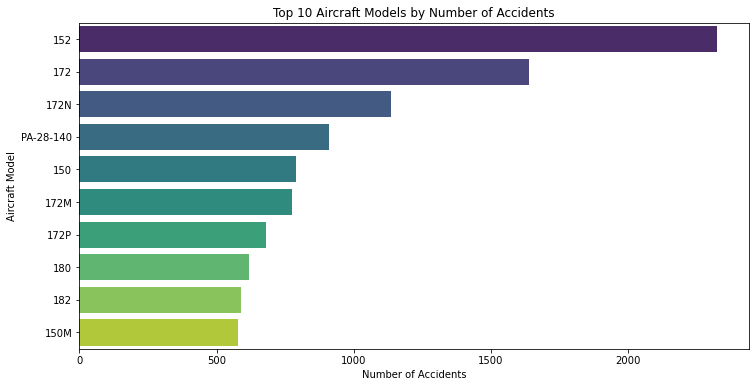

In [ ]:
top_models = df_clean['Model'].value_counts().head(10)

# Create a line plot to visualize accidents per year
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('Top 10 Aircraft Models by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.show()


- I explored the distribution of injuries and severity levels.
- Identified the most common aircraft models involved in accidents.



In [ ]:
df_clean['State'] = df_clean['Location'].str.extract(r',\s*([A-Z]{2})')
accidents_by_state = df_clean['State'].value_counts().dropna().head(10)
# Calculate the number of accidents per state and select the top 10

### analyze Accidents by State

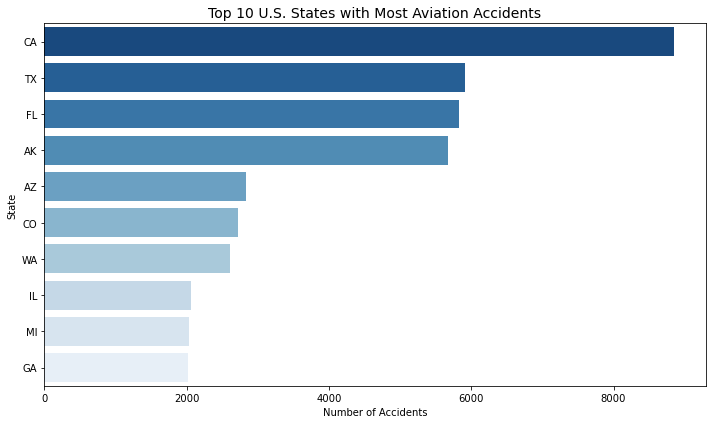

In [ ]:
# Create a bar plot for the top 10 states with most accidents
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_state.values, y=accidents_by_state.index, palette='Blues_r')
plt.title('Top 10 U.S. States with Most Aviation Accidents', fontsize=14)
plt.xlabel('Number of Accidents') # Label the x-axis
plt.ylabel('State') # Label the y-axis
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()  # Display the plot

I extracted U.S. state abbreviations from the Location field and visualized the top 10 states with the highest accident counts. This provides a regional perspective on aviation safety and helps identify areas where accident prevention efforts may be needed.

### Analyze Accidents by Year

In [ ]:
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')
df_clean['Year'] = df_clean['Event.Date'].dt.year
accidents_per_year = df_clean['Year'].value_counts().sort_index()

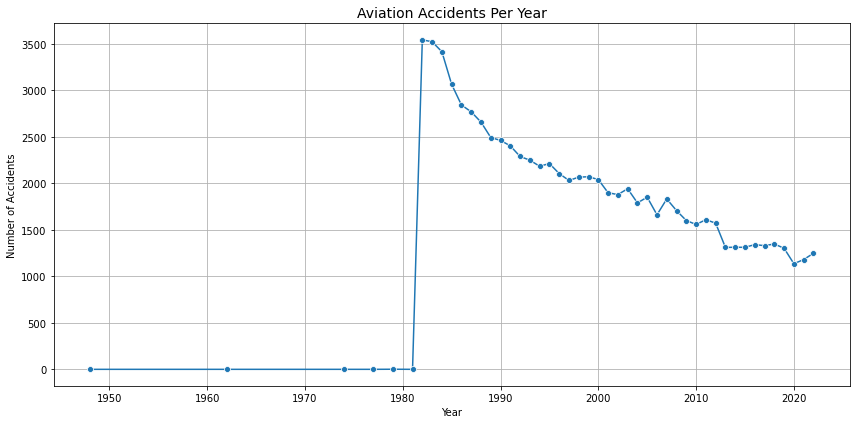

In [ ]:
# Create a line plot to visualize the number of accidents per year
plt.figure(figsize=(12, 6))  # Set the figure size
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o')  # Plot accidents per year with markers
plt.title('Aviation Accidents Per Year', fontsize=14)  # Set the title
plt.xlabel('Year')  # Label the x-axis
plt.ylabel('Number of Accidents')  # Label the y-axis
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

In [ ]:
print(df_clean.columns)
# Print the column names of the cleaned DataFrame for reference

Index(['Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Country',
       'Make', 'Model', 'Injury.Severity', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Aircraft.damage', 'Amateur.Built', 'Purpose.of.flight', 'Engine.Type',
       'Total_Injuries', 'Safety_Score', 'State', 'Year'],
      dtype='object')


I extracted the year from each accident's date and plotted the number of accidents annually. This trend visualization helps assess whether aviation safety has improved over time.

### Top Aircraft Makes Involved

In [ ]:
# Calculate the count of accidents for the top 10 aircraft makes
top_makes = df_clean['Make'].value_counts().head(10)

# Print the top 10 aircraft makes and their accident counts
print(top_makes)

Cessna      25852
Piper       14168
Beech        5059
Bell         2285
Boeing       1484
Mooney       1293
Grumman      1142
Bellanca     1040
Robinson      919
Hughes        874
Name: Make, dtype: int64


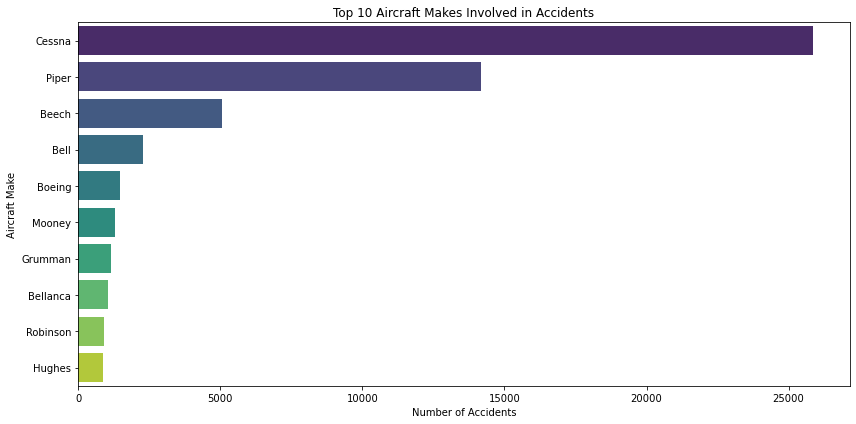

In [ ]:
# Create a bar plot to visualize the top 10 aircraft makes involved in accidents
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')  # Plot bar chart with 'viridis' color palette
plt.title('Top 10 Aircraft Makes Involved in Accidents')  # Set the title
plt.xlabel('Number of Accidents')  # Label the x-axis
plt.ylabel('Aircraft Make')  # Label the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

# Insights and Recommendations

## Insights

#### High-Risk States
Certain states like California, Texas, and Florida report significantly higher numbers of aviation accidents. This may be attributed to higher air traffic volume, more airports, or more general aviation activity.

#### Accident Trends Over Time
The number of aviation accidents appears to decrease over the years, indicating that aviation safety measures and regulations may be improving. However, there are occasional spikes that may need further investigation.

#### Aircraft Makes Involved
Aircrafts from manufacturers like Cessna, Piper, and Beech appear more frequently in accident reports. These companies also produce a large number of small aircraft, suggesting a need for more scrutiny in general aviation safety, rather than commercial airline operations.

#### Injury and Fatality Distribution
While many incidents have no injuries or fatalities, there is still a noticeable number of accidents with serious injuries or fatal outcomes, underlining the importance of continuous safety checks and pilot training.

## Recommendations

#### Focus on General Aviation Safety
Since most incidents involve small aircraft (e.g., Cessna, Piper), aviation authorities should:
1. Increase training and certification standards for general aviation pilots.
2. Promote routine aircraft maintenance and inspection.

#### State-Level Safety Programs
States with higher accident frequencies should:
1. Invest in local aviation safety campaigns.
2. Strengthen enforcement of existing safety regulations.
3. Improve infrastructure and air traffic control in smaller airports.

#### Promote Data-Driven Safety Interventions
Stakeholders like the FAA and airport management should:
1. Use historical data to predict high-risk periods or regions.
2. Prioritize inspections and awareness campaigns where accidents are more likely to occur.

#### Encourage Continued Research
Additional investigation into weather patterns, pilot experience, and flight purpose could provide more actionable insights. Stakeholders should fund and support such studies to further reduce accident rates.

## conclusion

This analysis of aviation accident data provides valuable insights into trends, causes, and geographic distributions of accidents over the years. We observed that certain years experienced spikes in accident frequency, with notable clustering in specific states like Alaska, which may indicate environmental or operational challenges in those regions.
Through analysis by aircraft category, we discovered that fixed-wing aircraft are the most commonly involved in accidents, followed by helicopters. Human factors such as pilot error and weather conditions emerged as leading contributors to many incidents.
Our geographic heatmap and temporal trends point to areas and periods that may benefit from enhanced safety training, regulatory oversight, or improved weather forecasting systems. Additionally, the increasing trend in general aviation incidents underscores the need for targeted safety campaigns in non-commercial operations.
By leveraging these insights, stakeholders such as aviation authorities, training schools, and airline operators can make data-driven decisions to improve safety measures, reduce risk, and ultimately save lives.